In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Lasso regression w/ one variable

## Create data

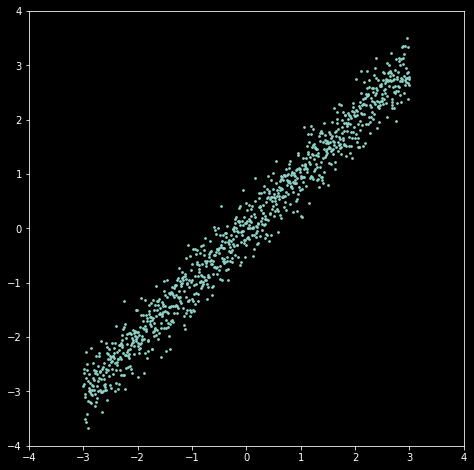

In [2]:
nPts = 1000

m = 1
b = 0

x = np.linspace(-3, 3, nPts)
y = m*x + b + np.random.normal(0, 0.3, nPts)
#y = 0.3*x**2 + np.random.normal(0, 0.3, nPts)
#y = np.sin(x) + np.random.normal(0, 0.3, nPts)

X = x[:,np.newaxis]

plt.figure(figsize=(8,8))
plt.scatter(x, y, label='Data', s=3);
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().set_aspect('equal')

## Model

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

1.4079607108847907

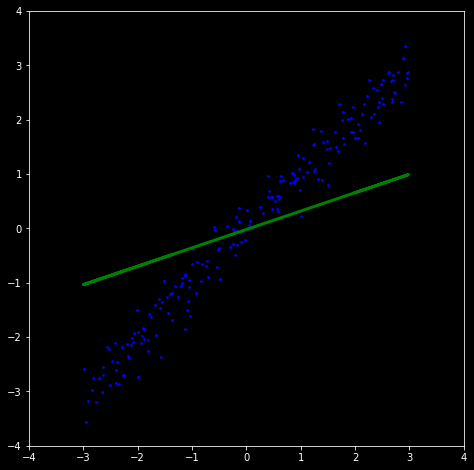

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(X_test, y_test, color='b', s=3);
plt.plot(X_test, y_pred, 'g', linewidth=3);
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().set_aspect('equal')

## Varying alpha

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

# Define alpha values
alphas = np.linspace(0, 10, 100)

# Initialize storage arrays
r2s_train = []
r2s_test  = []
mse_train = []
mse_test  = []
coefs     = []

for a in alphas:
    model = Lasso(alpha=a)  # Switch to Ridge(alpha=a) if needed

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute R² scores
    r2s_train.append(r2_score(y_train, y_train_pred))
    r2s_test.append(r2_score(y_test, y_test_pred))
    
    # Compute MSE
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients
    coefs.append(model.coef_)
# end

# Convert to NumPy arrays for efficient computation
r2s_train = np.array(r2s_train)
r2s_test  = np.array(r2s_test)
mse_train = np.array(mse_train)
mse_test  = np.array(mse_test)
coefs     = np.array(coefs)

C:\Users\Graham West\AppData\Local\Temp\ipykernel_18276\2440853614.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
C:\Users\Graham West\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Graham West\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.48018560442178, tolerance: 0.2496236489397511
  model = cd_fast.enet_coordinate_descent(


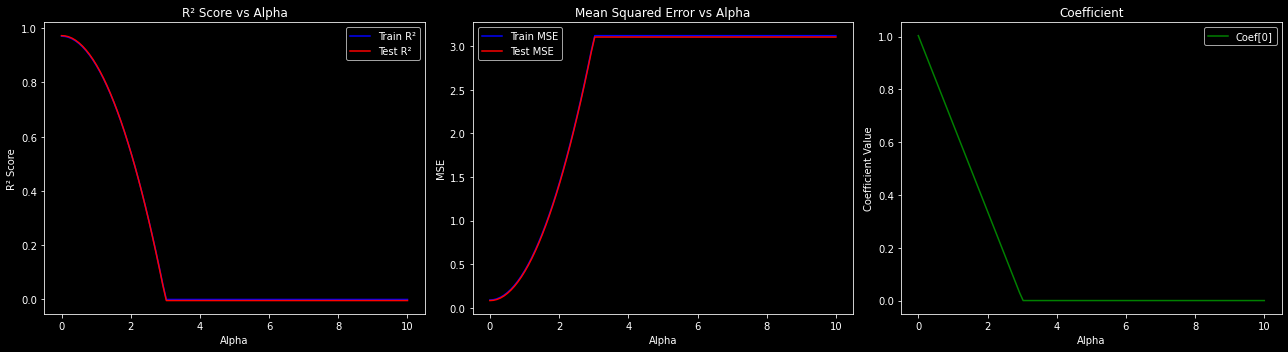

In [8]:
# Create figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot R² scores (Train vs. Test)
axes[0].plot(alphas, r2s_train, 'b', label="Train R²")
axes[0].plot(alphas, r2s_test, 'r', label="Test R²")
axes[0].set_title("R² Score vs Alpha")
axes[0].set_xlabel("Alpha")
axes[0].set_ylabel("R² Score")
axes[0].legend()

# Plot MSE values (Train vs. Test)
axes[1].plot(alphas, mse_train, 'b', label="Train MSE")
axes[1].plot(alphas, mse_test, 'r', label="Test MSE")
axes[1].set_title("Mean Squared Error vs Alpha")
axes[1].set_xlabel("Alpha")
axes[1].set_ylabel("MSE")
axes[1].legend()

# Plot first feature's coefficients across alpha values
axes[2].plot(alphas, coefs[:, 0], 'g', label="Coef[0]")
axes[2].set_title("Coefficient")
axes[2].set_xlabel("Alpha")
axes[2].set_ylabel("Coefficient Value")
axes[2].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Lasso regression w/ many variable

## Create data

In [9]:
from sklearn import datasets

n_feat = 15

X, y = datasets.make_regression(
    n_samples=1000,
    n_features=n_feat,
    noise=125
)

## Model

You **MUST** standard scale before doing Lasso with multiple variables so that they are all treated equally.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

[ 9.10251266 -7.31229478 69.60305756 52.56885682 55.21482366 26.25715974
 11.95403043 85.50877942  1.2246251   7.28501898 86.63404971 86.6535627
 77.40546152 38.94062319 -3.37486045]


C:\Users\Graham West\AppData\Local\Temp\ipykernel_18276\3866884460.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
C:\Users\Graham West\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Graham West\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6418723.296453029, tolerance: 4582.268203342685
  model = cd_fast.enet_coordinate_descent(


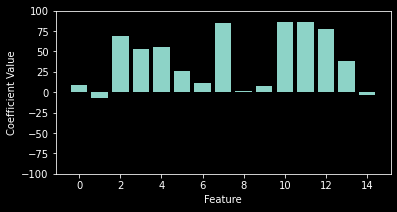

In [11]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

model = Lasso(alpha=0)
#model = Ridge(alpha=50)

model.fit(X_train, y_train)

coef = model.coef_
print(coef)

plt.figure(figsize=(6,3));
plt.bar(range(n_feat), coef);
plt.xlabel('Feature');
plt.ylabel('Coefficient Value');
plt.ylim(-100,100);

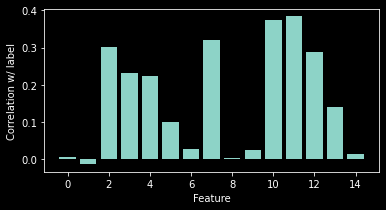

In [12]:
corr = []

for i in range(n_feat):
    corr.append( np.corrcoef(y,X[:,i])[0,1] )
# end

plt.figure(figsize=(6,3));
plt.bar(range(n_feat), corr);
plt.xlabel('Feature');
plt.ylabel('Correlation w/ label');

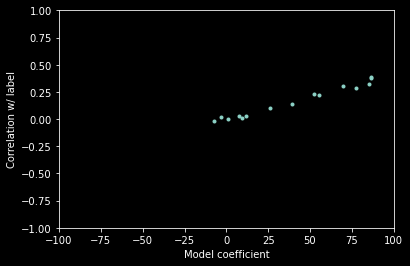

In [13]:
plt.plot( coef, corr, '.' )
plt.xlim(-100,100);
plt.ylim(-1,1);
plt.xlabel('Model coefficient');
plt.ylabel('Correlation w/ label');

## Varying alpha

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

# Define alpha values
alphas = np.linspace(0, 100, 100)

# Initialize storage arrays
r2s_train = []
r2s_test  = []
mse_train = []
mse_test  = []
coefs     = []
non_zero  = []

for a in alphas:
    model = Lasso(alpha=a)  # Switch to Ridge(alpha=a) if needed

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute R² scores
    r2s_train.append(r2_score(y_train, y_train_pred))
    r2s_test.append(r2_score(y_test, y_test_pred))
    
    # Compute MSE
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients
    coefs.append(model.coef_)

    # Get number of non-zero coefficients
    non_zero.append( (model.coef_ != 0).sum() )
# end

# Convert to NumPy arrays for efficient computation
r2s_train = np.array(r2s_train)
r2s_test  = np.array(r2s_test)
mse_train = np.array(mse_train)
mse_test  = np.array(mse_test)
coefs     = np.array(coefs)
non_zero  = np.array(non_zero)

C:\Users\Graham West\AppData\Local\Temp\ipykernel_18276\2155645223.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
C:\Users\Graham West\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Graham West\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6418723.296453029, tolerance: 4582.268203342685
  model = cd_fast.enet_coordinate_descent(


No handles with labels found to put in legend.


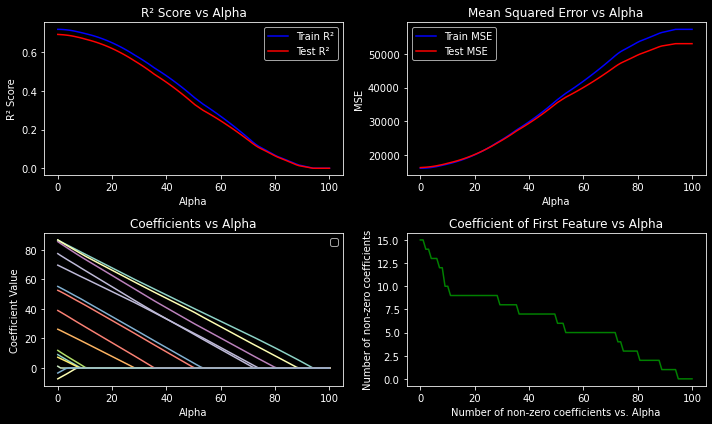

In [17]:
# Create figure with 3 subplots side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

# Plot R² scores (Train vs. Test)
axes[0].plot(alphas, r2s_train, 'b', label="Train R²")
axes[0].plot(alphas, r2s_test, 'r', label="Test R²")
axes[0].set_title("R² Score vs Alpha")
axes[0].set_xlabel("Alpha")
axes[0].set_ylabel("R² Score")
axes[0].legend()

# Plot MSE values (Train vs. Test)
axes[1].plot(alphas, mse_train, 'b', label="Train MSE")
axes[1].plot(alphas, mse_test, 'r', label="Test MSE")
axes[1].set_title("Mean Squared Error vs Alpha")
axes[1].set_xlabel("Alpha")
axes[1].set_ylabel("MSE")
axes[1].legend()

# Plot first feature's coefficients across alpha values
for i in range(coefs.shape[1]):
    axes[2].plot( alphas, coefs[:,i] )
# end
axes[2].set_title("Coefficients vs Alpha")
axes[2].set_xlabel("Alpha")
axes[2].set_ylabel("Coefficient Value")
axes[2].legend()

# Plot first feature's coefficients across alpha values
axes[3].plot(alphas, non_zero, 'g', label="Coef[0]")
axes[3].set_title("Coefficient of First Feature vs Alpha")
axes[3].set_xlabel("Number of non-zero coefficients vs. Alpha")
axes[3].set_ylabel("Number of non-zero coefficients")

# Adjust layout and show plot
plt.tight_layout()
plt.show()